In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
covid_data.drop(columns = ['fips', 'county'], inplace = True) # Remove columns fips and county  

covid_data.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0


In [4]:
# RETRIEVE COVID-19 DATA FROM 2022-01-01 to 2022-12-31
covid_data_2022 = covid_data[covid_data['date'] > '2021-12-31']

covid_data_2022.head()

,date,state,cases,deaths
2070110,2022-01-01,Alabama,11018,160.0
2070111,2022-01-01,Alabama,39911,593.0
2070112,2022-01-01,Alabama,3860,81.0
2070113,2022-01-01,Alabama,4533,95.0
2070114,2022-01-01,Alabama,11256,198.0


In [5]:
# FIND TOTAL AMOUNT of CASES EACH DAY IN 2022
covid_data_2022_by_date = covid_data_2022.groupby('date')['cases', 'deaths'].sum().reset_index()
covid_data_2022_by_date.astype({'cases': int, 'deaths': int})

covid_data_2022_by_date.head()

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75427/2599951874.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_data_2022_by_date = covid_data_2022.groupby('date')['cases', 'deaths'].sum().reset_index()


,date,cases,deaths
0,2022-01-01,54850427,824609.0
1,2022-01-02,55137064,824841.0
2,2022-01-03,56155999,826491.0
3,2022-01-04,57041905,828853.0
4,2022-01-05,57745969,830981.0


In [11]:
# ASSIGN EACH DATE a VALUE, STARTING with the INITIAL DATE at 1
x = pd.Series(range(1, len(covid_data_2022_by_date['date']) + 1))[:, np.newaxis]

y_cases = covid_data_2022_by_date['cases']
y_deaths = covid_data_2022_by_date['deaths']

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75427/3389970430.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = pd.Series(range(1, len(covid_data_2022_by_date['date']) + 1))[:, np.newaxis]


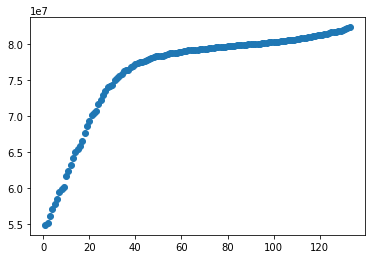

In [12]:
# SCATTER PLOT of COVID CASES IN 2022

plt.scatter(x, y_cases) # Ln(x), NATURAL LOG

In [14]:
# DETERMINE Y-INTERCEPT and SLOPE FOR COVID DEATHS IN 2022

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x, y_deaths)

xfit = np.linspace(0, 150, 15)
yfit = model.predict(xfit[:, np.newaxis])

print(model.intercept_, model.coef_)

847723.3000683526 [1349.47492884]


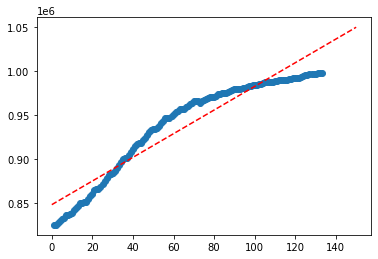

In [15]:
# SCATTER PLOT of COVID DEATHS IN 2022 WITH THE LINE OF BEST FIT

plt.plot(xfit, yfit, '--r')
plt.scatter(x, y_deaths) 